In [ ]:
#KNN adalah model machine learning yg dpt digunakan untuk melakukan prediksi berdasarkan kedekatan karakteristik dengan sejumlah tetangga terdekat

In [1]:
#Sample Dataset

import pandas as pd

sensus = {
    'Tinggi': [155, 163, 170, 180, 190, 165, 175, 185, 158],
    'Berat': [40, 55, 70, 80, 35, 48, 60, 65, 50],
    'JK': [
        'Pria', 'Pria', 'Pria', 'Pria', 'Wanita', 'Wanita', 'Wanita', 'Wanita', 'Wanita'
    ]
}

sensus_df = pd.DataFrame(sensus)
sensus_df

,Tinggi,Berat,JK
0,155,40,Pria
1,163,55,Pria
2,170,70,Pria
3,180,80,Pria
4,190,35,Wanita
5,165,48,Wanita
6,175,60,Wanita
7,185,65,Wanita
8,158,50,Wanita


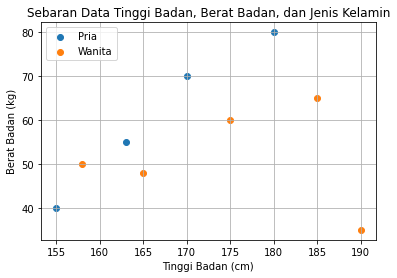

In [2]:
#Visualisasi Data

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for JK, d in sensus_df.groupby('JK'):                #Melakukan looping terhdap data sensus_df nya, sensus_df nya digrouping berdasarkan JK, d berisi sekumpulan data dari kelompok JK tertentu                
    ax.scatter(d['Tinggi'], d['Berat'], label=JK)    #Sb X akan diasosiakan dgn tinggi & sb Y akan diasosiakan dgn berat
    
plt.legend(loc='upper left')          #Parameter loc digunakan utk mengatur lokasi atau posisi dari legendnya
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

In [3]:
#Preprocessing Dataset

import numpy as np

X_train = np.array(sensus_df[['Tinggi', 'Berat']])
y_train = np.array(sensus_df['JK'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[155  40]
 [163  55]
 [170  70]
 [180  80]
 [190  35]
 [165  48]
 [175  60]
 [185  65]
 [158  50]]

y_train: ['Pria' 'Pria' 'Pria' 'Pria' 'Wanita' 'Wanita' 'Wanita' 'Wanita' 'Wanita']


In [4]:
#LabelBinarizer utk melakukan konversi nilai string menjadi numerik biner

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [5]:
#Mengembalikan menjadi array 1 dimensi dengan menggunakan method flatten

y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [0 0 0 0 1 1 1 1 1]


In [6]:
#Training KNN Classification Model

from sklearn.neighbors import KNeighborsClassifier

K = 3                #nilai parameter k ini digunakan utk menentukan jmlh tetangga terdekat yg akan dilibatkan utk proses prediksi 
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
#Prediksi Jenis Kelamin

tinggi_badan = 170
berat_badan = 75
X_new = np.array([tinggi_badan, berat_badan]).reshape(1, -1) #Memanggil method reshape utk menjadi array 2 dimensi
X_new

array([[170,  75]])

In [8]:
y_new = model.predict(X_new)
y_new

array([0])

In [9]:
lb.inverse_transform(y_new)

array(['Pria'], dtype='<U6')

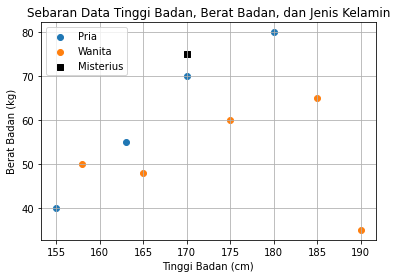

In [10]:
#Visualisasi Nearest Neighbours

fig, ax = plt.subplots()
for JK, d in sensus_df.groupby('JK'):                            
    ax.scatter(d['Tinggi'], d['Berat'], label=JK)

plt.scatter(tinggi_badan,
            berat_badan,
            marker='s',
            color='black',
            label='Misterius')

plt.legend(loc='upper left')        
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

In [11]:
#Kalkulasi Distance (Euclidean Distance)

misterius = np.array([tinggi_badan, berat_badan])
misterius

array([170,  75])

In [12]:
X_train

array([[155,  40],
       [163,  55],
       [170,  70],
       [180,  80],
       [190,  35],
       [165,  48],
       [175,  60],
       [185,  65],
       [158,  50]], dtype=int64)

In [13]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in X_train]   #function euclidean digunakan untuk mengukur jarak antara data point misterius dgn data poin lain didalam variable X_train 
data_jarak

[38.07886552931954,
 21.18962010041709,
 5.0,
 11.180339887498949,
 44.721359549995796,
 27.459060435491963,
 15.811388300841896,
 18.027756377319946,
 27.730849247724095]

In [14]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

,Tinggi,Berat,JK,jarak
2,170,70,Pria,5.000000
3,180,80,Pria,11.180340
6,175,60,Wanita,15.811388
7,185,65,Wanita,18.027756
1,163,55,Pria,21.189620
5,165,48,Wanita,27.459060
8,158,50,Wanita,27.730849
0,155,40,Pria,38.078866
4,190,35,Wanita,44.721360


In [15]:
#Evaluasi KNN Classification Model

#Testing Set

X_test = np.array([[170, 70], [182, 84], [168, 54], [186, 75]])
y_test = lb.transform(np.array(['Pria', 'Pria', 'Wanita', 'Wanita'])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}')

X_test:
[[170  70]
 [182  84]
 [168  54]
 [186  75]]

y_test:
[0 0 1 1]


In [16]:
#Prediksi terhadap testing set

y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0])

In [17]:
#Accuracy

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred) #y_test merupakan target dari testing set, y_pred merupakan hasil prediksi untuk target dari testing setnya

print(f'Accuracy: {acc}')

Accuracy: 0.75


In [18]:
#Precission

from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)

print(f'Precission: {prec}')

Precission: 1.0


In [19]:
#Recall

from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print(f'Recall: {rec}')

Recall: 0.5


In [20]:
#F1 Score

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f'F1-score: {f1}')

F1-score: 0.6666666666666666


In [21]:
#Classification Report, untuk menampilkan precision, recall & f1-score secara bersamaan

from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)

print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [22]:
#Matthews Coreelation Coefficient (MCC), Nilai tertinggi MCC adalah 1

from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'MCC: {mcc}')

MCC: 0.5773502691896258
